# Task 1 - Setup and Data Preparation
For this task, you will:
- Import necessary packages for executing the code
- Install the EMNIST package
- Load the EMINST (letters) data and study its basic features such as its shape
- Convert the pixel gray levels of the images into the range [0,1]
- One-hot encode the class labels in the data
- Flatten the image data into 1-D arrays for FCFNN

In [1]:
# Import 'numpy' and 'pandas' to work with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import methods for building neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

# Import 'GridSearchCV' for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import 'KerasClassifier' from 'keras' for connecting neural networks with 'sklearn' and 'GridSearchCV'
from keras.wrappers.scikit_learn import KerasClassifier

# Import method to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import idx2numpy

In [4]:
letters_test = idx2numpy.convert_from_file("emnist-letters-test-images-idx3-ubyte")

In [5]:
letters_train = idx2numpy.convert_from_file("emnist-letters-train-images-idx3-ubyte")

In [6]:
letters_test_labels = idx2numpy.convert_from_file("emnist-letters-test-labels-idx1-ubyte")

In [7]:
letters_train_labels = idx2numpy.convert_from_file("emnist-letters-train-labels-idx1-ubyte")

In [8]:
X_train, y_train = letters_train, letters_train_labels

In [9]:
X_test, y_test = letters_test, letters_test_labels

In [10]:
print('Train data shape: ', X_train.shape) # (124800, 28, 28) --- 124800 images, each 28x28 pixels
print('Test data shape: ', X_test.shape) # (20800, 28, 28) --- 20800 images, each 28x28

Train data shape:  (124800, 28, 28)
Test data shape:  (20800, 28, 28)


In [11]:
# Look at the frequency of the unique class labels in the training data
unique, counts = np.unique(y_train, return_counts = True)
print('Train labels: ', dict(zip(unique, counts)))

# Look at the frequency of the unique class labels in the testing data
unique, counts = np.unique(y_test, return_counts = True)
print('Test labels: ', dict(zip(unique, counts)))

print('\n')
print('Note that the labels 1, 2, 3, ..., 26 represent the 26 letters of the English alphabet.')

Train labels:  {1: 4800, 2: 4800, 3: 4800, 4: 4800, 5: 4800, 6: 4800, 7: 4800, 8: 4800, 9: 4800, 10: 4800, 11: 4800, 12: 4800, 13: 4800, 14: 4800, 15: 4800, 16: 4800, 17: 4800, 18: 4800, 19: 4800, 20: 4800, 21: 4800, 22: 4800, 23: 4800, 24: 4800, 25: 4800, 26: 4800}
Test labels:  {1: 800, 2: 800, 3: 800, 4: 800, 5: 800, 6: 800, 7: 800, 8: 800, 9: 800, 10: 800, 11: 800, 12: 800, 13: 800, 14: 800, 15: 800, 16: 800, 17: 800, 18: 800, 19: 800, 20: 800, 21: 800, 22: 800, 23: 800, 24: 800, 25: 800, 26: 800}


Note that the labels 1, 2, 3, ..., 26 represent the 26 letters of the English alphabet.


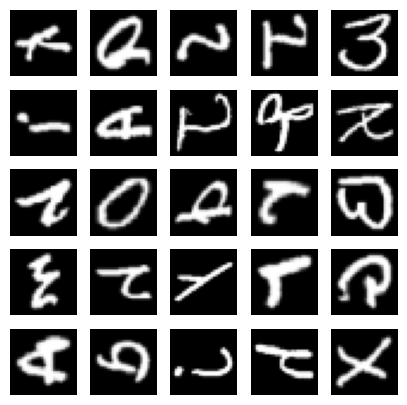

In [12]:
# Sample 25 EMNIST images from the training data and view the images
indices = np.random.randint(0, X_train.shape[0], size = 25)

images = X_train[indices]
labels = y_train[indices]

plt.figure(figsize = (5, 5))

for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap = 'gray')
    plt.axis('off')

plt.show()
plt.close('all')

In [13]:
# Convert the pixel gray level values from the range [0, 255] to the range [0,1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

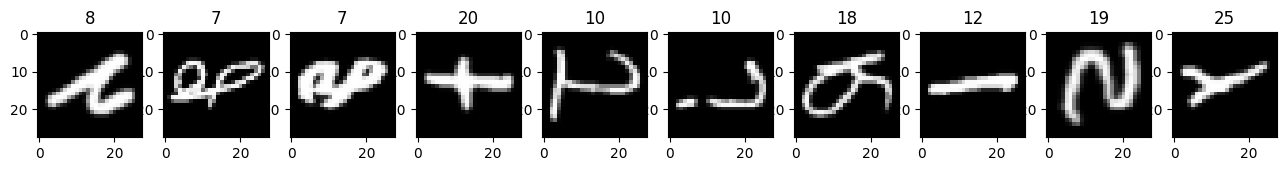

In [14]:
# View a few training data images and their corresponding labels
indices = np.random.randint(0, X_train.shape[0], size = 10)
plt.figure(figsize = (16, 8))

indexcount = 0
for data_index in indices:
    indexcount = indexcount + 1
    plt.subplot(1, 10, indexcount)
    plt.imshow(X_train[data_index], cmap = 'gray')
    plt.title(str(y_train[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

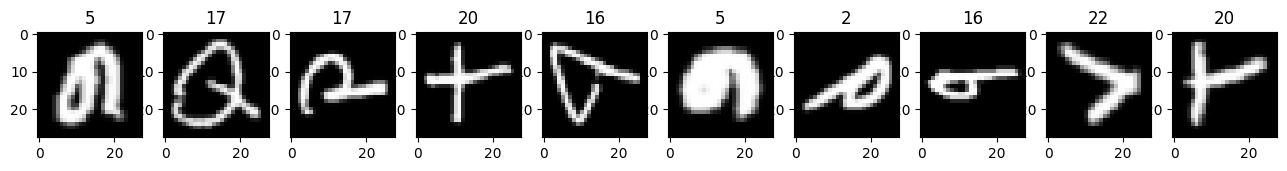

In [15]:
# View a few testing data images and their corresponding labels
indices = np.random.randint(0, X_test.shape[0], size = 10)
plt.figure(figsize = (16, 8))

indexcount = 0
for data_index in indices:
    indexcount = indexcount + 1
    plt.subplot(1, 10, indexcount)
    plt.imshow(X_test[data_index], cmap = 'gray')
    plt.title(str(y_test[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

In [16]:
# Convert the class labels to one-hot encoded vectors using the 'to_categorical()' function
num_classes = 26

# Note: Reduce all y labels by 1 to ensure that labeling starts at 0 and ends at 25
y_train = to_categorical(y_train - 1, num_classes)
y_test = to_categorical(y_test - 1, num_classes)

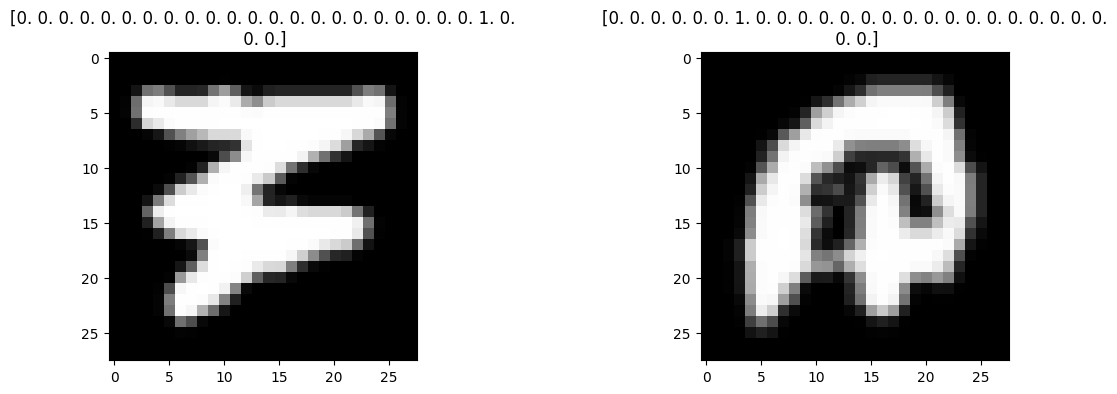

In [17]:
# View a couple of training data images and their corresponding labels
plt.figure(figsize = (14, 4))

for data_index in np.arange(0, 2, 1):
    plt.subplot(1, 2, data_index + 1)
    plt.imshow(X_train[data_index], cmap = 'gray')
    plt.title(str(y_train[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

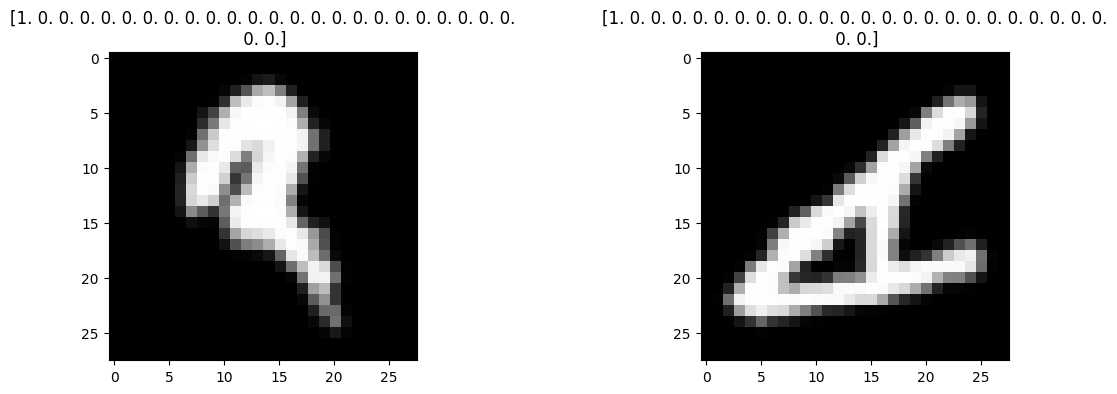

In [18]:
# View a couple of testing data images and their corresponding labels
plt.figure(figsize = (14, 4))

for data_index in np.arange(0, 2, 1):
    plt.subplot(1, 2, data_index + 1)
    plt.imshow(X_test[data_index], cmap = 'gray')
    plt.title(str(y_test[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

In [19]:
# Flatten the images by converting them into a list of values
image_vector_size = 28 * 28

X_train_fcfnn = X_train.reshape(X_train.shape[0], image_vector_size)
X_test_fcfnn = X_test.reshape(X_test.shape[0], image_vector_size)

# Task 2 - FCFNN
For this task, you will perform the following steps:
- Build a neural network with the following specifications:
  - Number of hidden layers = 1
  - Number of neurons in the hidden layer = 128
  - Activation function for all neurons except the output layer ones = *sigmoid*
  - Activation function for all output layer neurons = *softmax*
  - Loss function = *categorical_crossentropy*
  - Learning rate = 0.01 (with *RMSprop* optimizer)
- Train the network on the training data with a *batch_size* of 512
- Check its performance on the testing data

In [20]:
# Declare an instance of an artificial neural network model using the 'Sequential()' method
nn1 = Sequential()

# Add a hidden layer using the 'add()' and 'Dense()' methods
# Note: Set the 'units' parameter to 128 - This specifies the number of neurons in the hidden layer
# Note: Set the 'input_shape' parameter to (image_vector_size, ) - This specifies the number of input features for each record
# Note: Set the 'activation' parameter to 'sigmoid' - This specifies the activation function for this layer
nn1.add(Dense(units = 128,
              input_shape = (image_vector_size, ),
              activation = 'sigmoid'))

# Add the output layer using the 'add()' and 'Dense()' methods
# Note: Set the 'units' parameter to 'num_classes' - Multiclass classification with 26 classes requires 26 output neurons
# Note: Set the 'activation' parameter to 'softmax' - The softmax activation function is commonly used for output layer neurons in multiclass classification tasks
nn1.add(Dense(units = num_classes,
              activation = 'softmax'))

# Compile the model using the 'compile()' method
# Note: Set the 'loss' parameter to 'categorical_crossentropy' - The categorical crossentropy loss function is commonly used for multiclass classification tasks
# Note: Set the 'metrics' parameter to 'accuracy' - This records the accuracy of the model along with the loss during training
# Note: Set the 'optimizer' parameter to 'RMSprop' and set its 'learning_rate' parameter to 0.01 - This specifies the learning rate value
nn1.compile(loss = 'categorical_crossentropy',
            metrics = ['accuracy'],
            optimizer = RMSprop(learning_rate = 0.01))

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'validation_split' parameter to 0.2 - This sets aside 20% of the training data as validation data
# Note: Set the 'epochs' parameter to 10 - This specifies the scope of loss computations and parameter updates
# Note: Set the 'batch_size' to 512 - This specifies the batch size as 512 instead of the default value of 32
nn1.summary()
print('\n')
nn1_history = nn1.fit(X_train_fcfnn, y_train, validation_split = 0.2, batch_size = 512, epochs = 10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                                 
Total params: 103,834
Trainable params: 103,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
195/195 [==============================] - 4s 16ms/step - loss: 1.1195 - accuracy: 0.6748 - val_loss: 0.7053 - val_accuracy: 0.7891
Epoch 2/10
195/195 [==============================] - 3s 13ms/step - loss: 0.5705 - accuracy: 0.8276 - val_loss: 0.4999 - val_accuracy: 0.8504
Epoch 3/10
195/195 [==============================] - 2s 13ms/step - loss: 0.4484 - accuracy: 0.8614 - val_loss: 0.4560 - val_accuracy: 0.8612
Epoch 4/10
195/

In [21]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,1.119522,0.674780,0.705347,0.789143
2,0.570470,0.827554,0.499901,0.850441
3,0.448351,0.861358,0.456047,0.861178
4,0.389983,0.877674,0.428897,0.868309
5,0.354666,0.887240,0.410168,0.873598
6,0.329733,0.894211,0.391441,0.879407
7,0.310511,0.899359,0.390553,0.879207
8,0.293685,0.904187,0.392728,0.877885
9,0.280539,0.908003,0.384133,0.883093


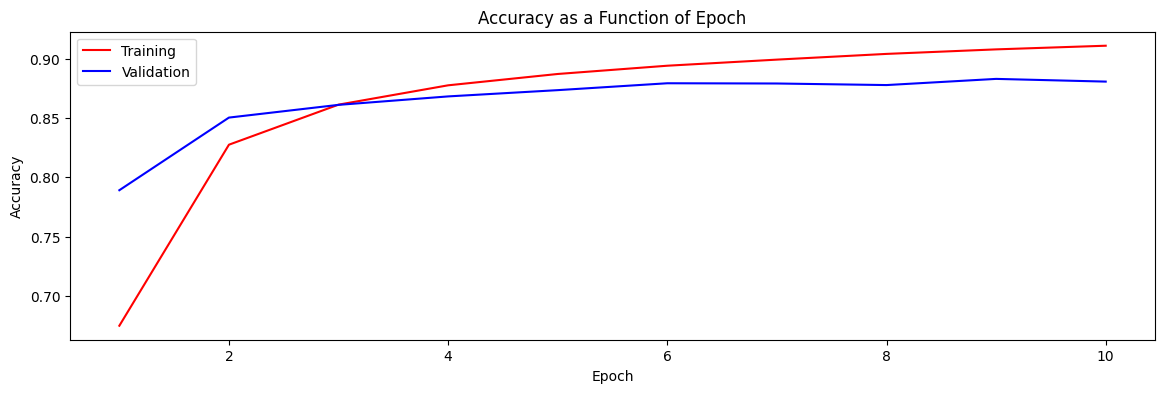

In [22]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [23]:
# Compute the accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = nn1.evaluate(X_test_fcfnn, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

650/650 [==============================] - 2s 3ms/step - loss: 0.3976 - accuracy: 0.8806
The loss value of the model on the test data is 0.3976486325263977
The accuracy of the model on the test data is 0.8805769085884094


# Task 3 - CNN: Hyperparameter Tuning
For this task, you will perform the following steps:
- Define a function that creates a CNN with the previously fixed specifications for the FCFNN part and the following fixed and variable hyperparameters for the CNN part:
  - Fixed hyperparameters:
    - Number of *Conv2D* and *MaxPooling2D* layer pairs = 1
  - Variable hyperparameters:
    - Number of filters in the *Conv2D* layer (set default as 1)
    - Filter size of filters in the *Conv2D* layer (set default as (3, 3))
      - Fix the strides for *Conv2D* layer filters as the *Keras* default (which is (1, 1))
    - Filter size of kernels in the *MaxPooling2D* layer (set default as (2, 2))
      - Fix the strides for *MaxPooling2D* layer filters as the *Keras* default (same as the filter size)
- Train the network on the training data set and observe its performance
- Tune the CNN model for the following hyperparameters:
  - Number of filters in the convolution layer
  - Size of filters in the convolution layer
  - Size of filters in the max pooling layer

In [24]:
# Define a function to create a CNN model with fixed and variable parameters along with previously fixed settings for FCFNN
# Note: The number of CNN layer pairs is fixed at 1
# Note: The strides of the convolution layer filters is fixed as the Keras default (which is (1, 1))
# Note: The strides of the max pooling layer filters is fixed as the Keras default (same as the filter size)
def create_cnn(n_filters = 1,
               filter_size = (3, 3),
               pool_filter_size = (2, 2)):
  
    # Declare an instance of a CNN model using the 'Sequential()' method
    cnn = Sequential()
    
    # Add a convolution layer using the 'add()' and 'Conv2D()' methods
    # Note: Set the 'filters' parameter to 'n_filters' - This specifies the number of fiters in the convolution layer
    # Note: Set the 'kernel_size' parameter to 'filter_size' - This specifies the size of the filters in the convolution layer
    # Note: Leave the 'strides' parameter at its default value - Keras uses (1, 1) by default
    # Note: Set the 'input_shape' parameter to '(28, 28, 1)' - This specifies the shape of the input given to the convolution layer   
    cnn.add(Conv2D(filters = n_filters,
                   kernel_size = filter_size,
                   input_shape = (28, 28, 1)))
    
    # Add a max pooling layer using the 'add()' and 'MaxPooling2D()' methods
    # Note: Set the 'pool_size' parameter to 'pool_filter_size' - This specifies the size of the filters in the maxpooling layer
    # Note: Leave the 'strides' parameter at its default value - Keras uses the filter size as the stride by default
    cnn.add(MaxPooling2D(pool_size = pool_filter_size))
    
    # Add a flatten layer using the 'add()' and 'Flatten()' methods
    cnn.add(Flatten())
    
    # Add a hidden layer using the 'add()' and 'Dense()' methods
    # Note: Set the 'units' parameter to 128
    # Note: Set the 'activation' parameter to 'sigmoid'
    cnn.add(Dense(units = 128,
                  activation = 'sigmoid'))
    
    # Add the output layer using the 'add()' and 'Dense()' methods
    # Note: Set the 'units' parameter to 'num_classes'
    # Note: Set the 'activation' parameter to 'softmax'
    cnn.add(Dense(units = num_classes,
                  activation = 'softmax'))
    
    # Compile the model using the 'compile()' method
    # Note: Set the 'loss' parameter to 'categorical_crossentropy'
    # Note: Set the 'metrics' parameter to 'accuracy'
    # Note: Set the 'optimizer' parameter to 'RMSprop' and set its 'learning_rate' parameter to 0.01
    cnn.compile(loss = 'categorical_crossentropy',
                metrics = ['accuracy'],
                optimizer = RMSprop(learning_rate = 0.01))
    
    return(cnn)

## Subtask 1 - Hyperparameter Tuning: Number of Convolution Filters
For this task, you will tune the CNN for the number of filters in the convolution layer.

In [25]:
# Declare a range of number of filters in the convolution layer to tune for
n_filters_list = [1, 4, 16, 32]

# Create and train a CNN model for each value of number of filters
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for current_n_filters in n_filters_list:
    indexcount = indexcount + 1
    
    # Create a CNN model using the 'create_cnn' function
    # Note: Set the 'n_filters' parameter to 'current_n_filters' - This specifies the current number of filters
    cnn = create_cnn(n_filters = current_n_filters)
    
    # Capture the training history of the model using the 'fit()' method
    # Note: Set the 'validation_split' parameter to 0.2
    # Note: Set the 'batch_size' parameter to 512 and the 'epochs' parameter to 10
    print('\n Training and validation for {} convolution filters - START \n'.format(current_n_filters))
    cnn.summary()
    print('\n')
    cnn_history = cnn.fit(X_train, y_train, validation_split = 0.2, batch_size = 512, epochs = 10)
    print('\n Training and validation for {} convolution filters - END \n'.format(current_n_filters))
    
    hist[indexcount] = pd.DataFrame(cnn_history.history)
    hist[indexcount]['epoch'] = cnn_history.epoch
    
    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Number of Convolution Filters': current_n_filters,
                                  'Train Accuracy': hist[indexcount]['accuracy'][9],
                                  'Validation Accuracy': hist[indexcount]['val_accuracy'][9]})
    
    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for 1 convolution filters - START 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 1)         10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 1)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 169)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               21760     
                                                                 
 dense_3 (Dense)             (None, 26)                3354      
                                                                 
Total params: 25,124
Trainable params: 25,124
Non-trainabl

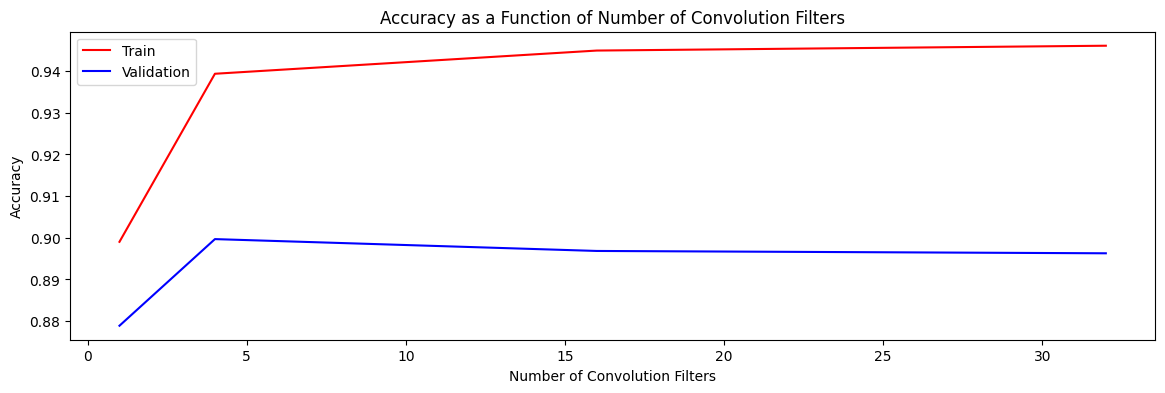

In [29]:
# View the training and validation accuracies as functions of number of convolution layer filters
plt.figure(figsize = (14, 4))

sns.lineplot(data = performance_df, x = 'Number of Convolution Filters', y = 'Train Accuracy', color = 'red', label = 'Train')
sns.lineplot(data = performance_df, x = 'Number of Convolution Filters', y = 'Validation Accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Number of Convolution Filters')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Number of Convolution Filters');

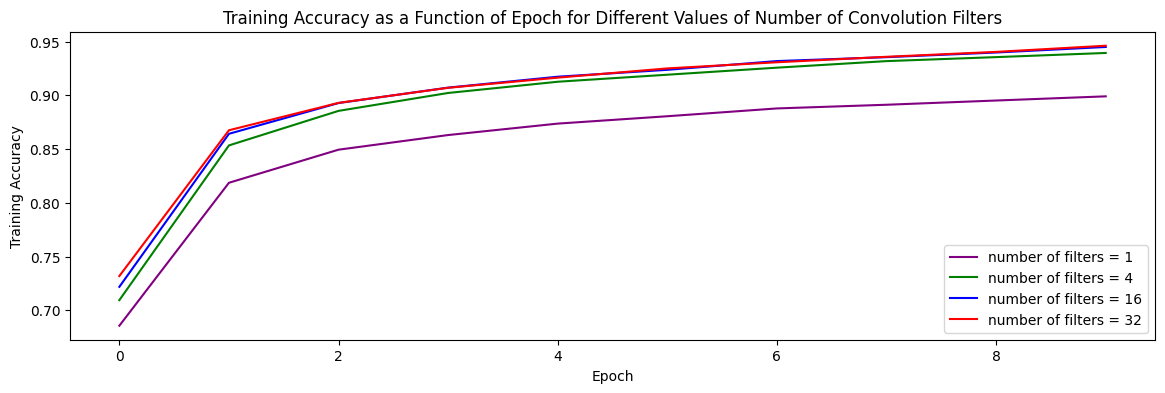

In [30]:
# View the training accuracies as functions of epochs for different values of number of convolution layer filters
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_n_filters in n_filters_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'accuracy',
                 color = colorlist[indexcount],
                 label = 'number of filters = ' + str(current_n_filters))

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Number of Convolution Filters');

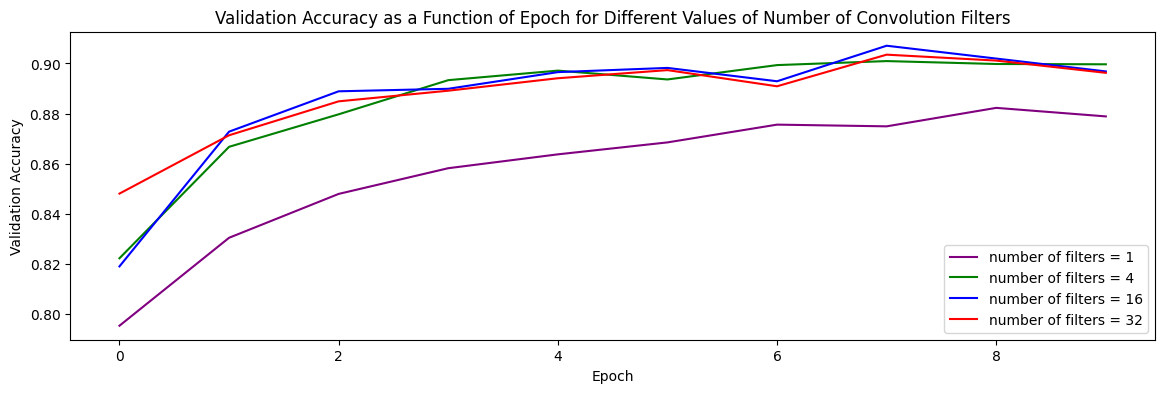

In [31]:
# View the validation accuracies as functions of epochs for different values of number of convolution layer filters
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_n_filters in n_filters_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'val_accuracy',
                 color = colorlist[indexcount],
                 label = 'number of filters = ' + str(current_n_filters))

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Number of Convolution Filters');

## Subtask 2 - Hyperparameter Tuning: Convolution Filter Size
For this task, you will tune the CNN for the size of filters in the convolution layer.

In [32]:
# Declare a range of sizes of the filters in the convolution layer to tune for
filter_size_list = [3, 5, 7, 9]

# Create and train a CNN model for each value of filter size
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for current_filter_size in filter_size_list:
    indexcount = indexcount + 1
    
    # Create a CNN model using the 'create_cnn' function
    # Note: Set the 'filter_size' parameter to '(current_filter_size, current_filter_size)' - This specifies the current filter size
    cnn = create_cnn(filter_size = (current_filter_size, current_filter_size))
    
    # Capture the training history of the model using the 'fit()' method
    # Note: Set the 'validation_split' parameter to 0.2
    # Note: Set the 'batch_size' parameter to 512 and the 'epochs' parameter to 10
    print('\n Training and validation for convolution filter size = {} - START \n'.format((current_filter_size, current_filter_size)))
    cnn.summary()
    print('\n')
    cnn_history = cnn.fit(X_train, y_train, validation_split = 0.2, batch_size = 512, epochs = 10)
    print('\n Training and validation for convolution filter size = {} - END \n'.format((current_filter_size, current_filter_size)))
    
    hist[indexcount] = pd.DataFrame(cnn_history.history)
    hist[indexcount]['epoch'] = cnn_history.epoch
    
    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Convolution Layer Filter Size': str((current_filter_size, current_filter_size)),
                                  'Train Accuracy': hist[indexcount]['accuracy'][9],
                                  'Validation Accuracy': hist[indexcount]['val_accuracy'][9]})
    
    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for convolution filter size = (3, 3) - START 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 1)         10        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 1)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 169)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               21760     
                                                                 
 dense_11 (Dense)            (None, 26)                3354      
                                                                 
Total params: 25,124
Trainable params: 25,124
N

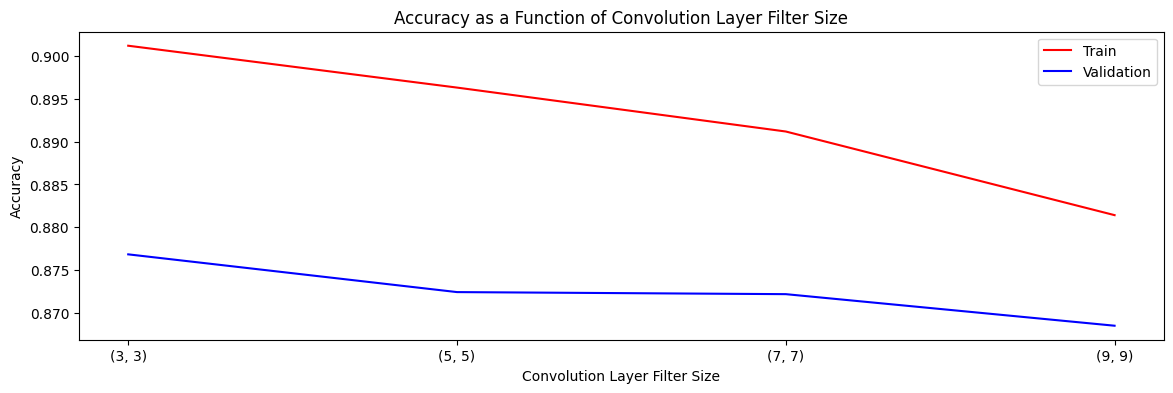

In [33]:
# View the training and validation accuracies as functions of convolution layer filter size
plt.figure(figsize = (14, 4))

sns.lineplot(data = performance_df, x = 'Convolution Layer Filter Size', y = 'Train Accuracy', color = 'red', label = 'Train')
sns.lineplot(data = performance_df, x = 'Convolution Layer Filter Size', y = 'Validation Accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Convolution Layer Filter Size')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Convolution Layer Filter Size');

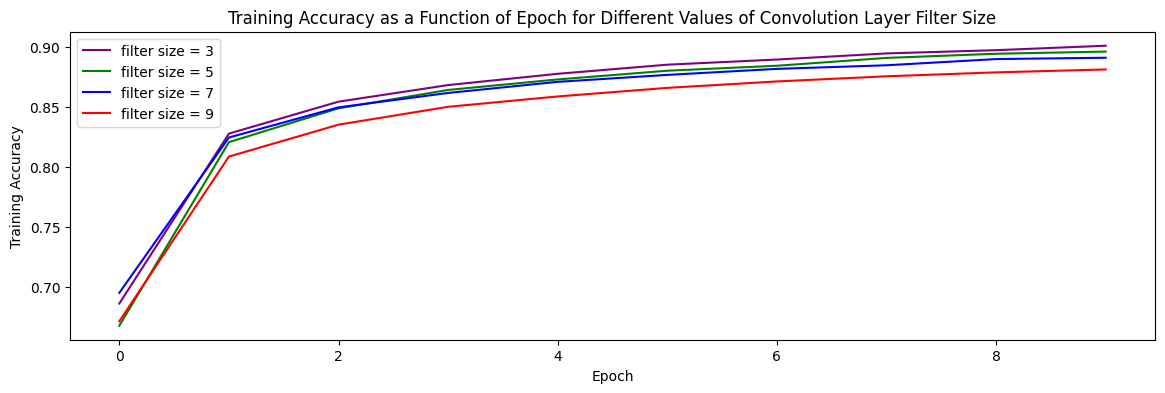

In [34]:
# View the training accuracies as functions of epochs for different values of convolution layer filter size
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_filter_size in filter_size_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'accuracy',
                 color = colorlist[indexcount],
                 label = 'filter size = ' + str(current_filter_size))

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Convolution Layer Filter Size');

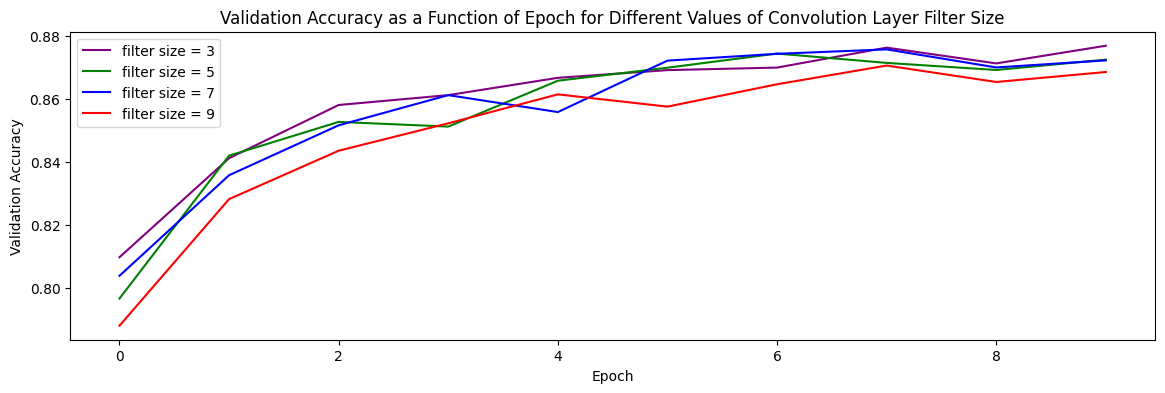

In [35]:
# View the validation accuracies as functions of epochs for different values of convolution layer filter size
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_filter_size in filter_size_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'val_accuracy',
                 color = colorlist[indexcount],
                 label = 'filter size = ' + str(current_filter_size))

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Convolution Layer Filter Size');

## Subtask 3 - Hyperparameter Tuning: Max Pooling Filter Size
For this task, you will tune the CNN for the size of filters in the max pooling layer.

In [36]:
# Declare a range of sizes of the filters in the max pooling layer to tune for
pool_size_list = [2, 4, 7, 14]

# Create and train a CNN model for each value of maxpooling layer filter size
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for current_pool_size in pool_size_list:
    indexcount = indexcount + 1
    
    # Create a CNN model using the 'create_cnn' function
    # Note: Set the 'pool_filter_size' parameter to '(current_pool_size, current_pool_size)' - This specifies the current max pooling layer filter size
    cnn = create_cnn(pool_filter_size = (current_pool_size, current_pool_size))
    
    # Capture the training history of the model using the 'fit()' method
    # Note: Set the 'validation_split' parameter to 0.2
    # Note: Set the 'batch_size' parameter to 512 and the 'epochs' parameter to 10
    print('\n Training and validation for max pooling filter size = {} - START \n'.format((current_pool_size, current_pool_size)))
    cnn.summary()
    print('\n')
    cnn_history = cnn.fit(X_train, y_train, validation_split = 0.2, batch_size = 512, epochs = 10)
    print('\n Training and validation for max pooling filter size = {} - END \n'.format((current_pool_size, current_pool_size)))
    
    hist[indexcount] = pd.DataFrame(cnn_history.history)
    hist[indexcount]['epoch'] = cnn_history.epoch
    
    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Max Pooling Filter Size': str((current_pool_size, current_pool_size)),
                                  'Train Accuracy': hist[indexcount]['accuracy'][9],
                                  'Validation Accuracy': hist[indexcount]['val_accuracy'][9]})
    
    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for max pooling filter size = (2, 2) - START 

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 1)         10        
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 1)        0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 169)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               21760     
                                                                 
 dense_19 (Dense)            (None, 26)                3354      
                                                                 
Total params: 25,124
Trainable params: 25,124
N

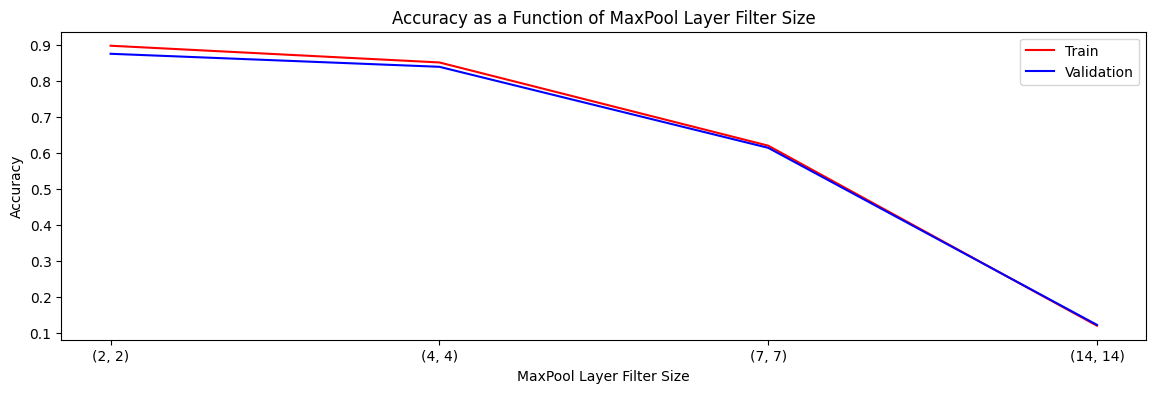

In [37]:
# View the training and validation accuracies as functions of maxpooling layer filter size
plt.figure(figsize = (14, 4))

sns.lineplot(data = performance_df, x = 'Max Pooling Filter Size', y = 'Train Accuracy', color = 'red', label = 'Train')
sns.lineplot(data = performance_df, x = 'Max Pooling Filter Size', y = 'Validation Accuracy', color = 'blue', label = 'Validation')
plt.xlabel('MaxPool Layer Filter Size')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of MaxPool Layer Filter Size');

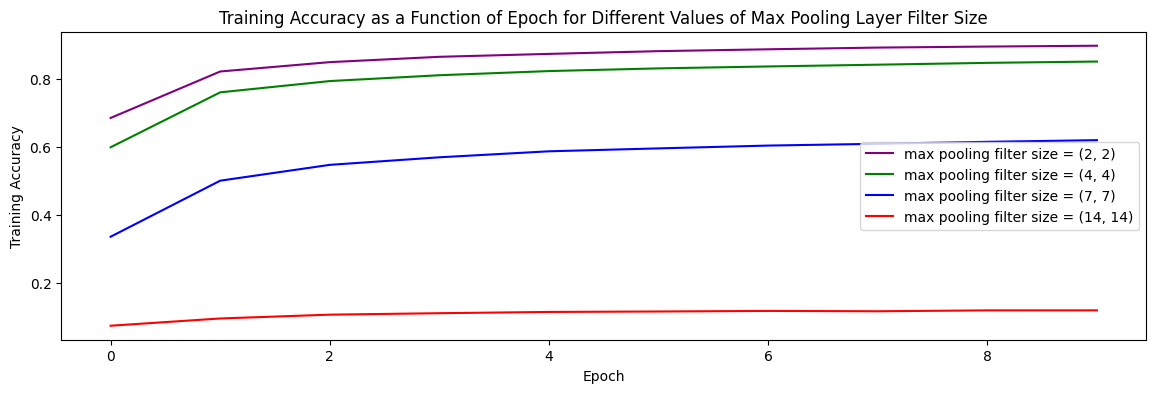

In [38]:
# View the training accuracies as functions of epochs for different values of maxpooling layer filter size
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_pool_size in pool_size_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'accuracy',
                 color = colorlist[indexcount],
                 label = 'max pooling filter size = ' + str((current_pool_size, current_pool_size)))

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Max Pooling Layer Filter Size');

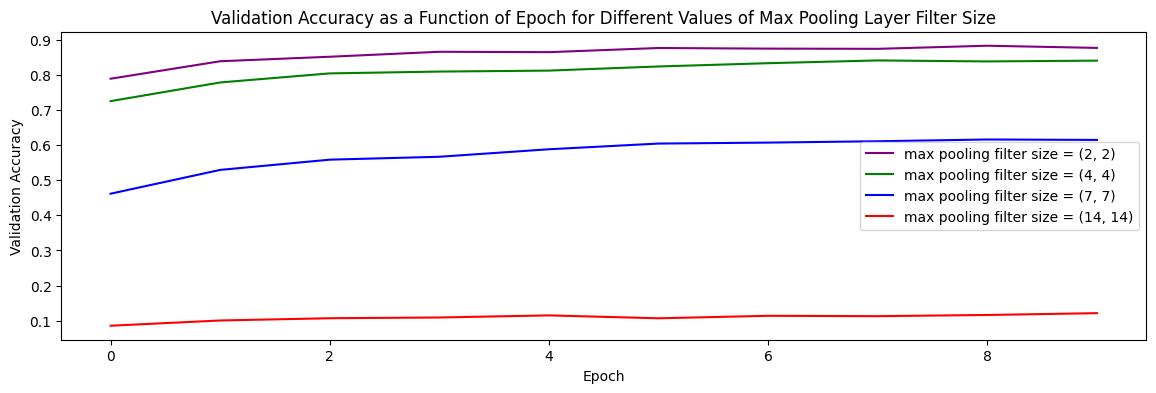

In [39]:
# View the validation accuracies as functions of epochs for different values of maxpooling layer filter size
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_pool_size in pool_size_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'val_accuracy',
                 color = colorlist[indexcount],
                 label = 'max pooling filter size = ' + str((current_pool_size, current_pool_size)))

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Max Pooling Layer Filter Size');

# Task 4 - Hyperparameter Tuning: Combinations of Hyperparameters
For this task, you will perform the following steps:
- Tune the CNN model on a combination of the following hyperparameters using *GridSearchCV*
  - Number of convolution layer filters
  - Convolution filter size
  - Max pooling filter size
- Retrain the CNN model with potentially optimal values for the different hyperparameters
- View the performance of the model on the training, validation and testing data sets

In [40]:
# Initialize a basic CNN object using the 'KerasClassifier()' method
# Note: Set the 'build_fn' parameter to 'create_cnn' - This converts the 'create_cnn' function into a 'KerasClassifier' object
base_grid_model = KerasClassifier(build_fn = create_cnn)

# Define a list of 'n_filters', 'filter_size' and 'pool_filter_size' parameters and store it in a parameter grid dictionary
parameters_grid = {'n_filters': [4, 16],
                   'filter_size': [(3, 3), (5, 5)],
                   'pool_filter_size': [(2, 2), (4, 4)]}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
# Note: Set the 'estimator' parameter to 'base_grid_model' - This specifies the estimator to be used by 'GridSearchCV()'
# Note: Set the 'param_grid' parameter to 'parameters_grid' - This specifies the grid of parameters to search over
# Note: Set the 'cv' parameter to 2 - This specifies the number of folds in the cross-validation process
# Note: Set the 'verbose' parameter to 4 - This helps show more relevant information during training
grid = GridSearchCV(estimator = base_grid_model,
                    param_grid = parameters_grid,
                    cv = 2,
                    verbose = 4)

# Train the model on the training data using the 'fit()' method
# Note: Set the 'batch_size' parameter to 512 and the 'epochs' parameter to 10
# Note: The 'validation_split' parameter isn't particularly required since cross-validation is already in place
grid_model = grid.fit(X_train, y_train, batch_size = 512, epochs = 10)

# Print the optimal values of 'n_filters', 'filter_size' and 'pool_filter_size'
best_n_filters = grid_model.best_params_['n_filters']
best_filter_size = grid_model.best_params_['filter_size']
best_pool_filter_size = grid_model.best_params_['pool_filter_size']
best_accuracy = grid_model.best_score_

print('\n The optimal value of number of convolution filters is', best_n_filters)
print('\n The optimal value of convolution filter size is', best_filter_size)
print('\n The optimal value of maxpooling filter size is', best_pool_filter_size)
print('\n The accuracy of the model with these optimal parameters is ', best_accuracy)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Epoch 1/10
122/122 [==============================] - 7s 48ms/step - loss: 1.1827 - accuracy: 0.6585
Epoch 2/10
122/122 [==============================] - 5s 45ms/step - loss: 0.6092 - accuracy: 0.8156
Epoch 3/10
122/122 [==============================] - 6s 52ms/step - loss: 0.4711 - accuracy: 0.8554
Epoch 4/10
122/122 [==============================] - 6s 53ms/step - loss: 0.3951 - accuracy: 0.8766
Epoch 5/10
122/122 [==============================] - 6s 53ms/step - loss: 0.3450 - accuracy: 0.8909
Epoch 6/10
122/122 [==============================] - 6s 51ms/step - loss: 0.3078 - accuracy: 0.9012
Epoch 7/10
122/122 [==============================] - 6s 49ms/step - loss: 0.2777 - accuracy: 0.9100
Epoch 8/10
122/122 [==============================] - 6s 52ms/step - loss: 0.2515 - accuracy: 0.9166
Epoch 9/10
122/122 [==============================] - 7s 58ms/step - loss: 0.2315 - accuracy: 0.9236
Epoch 10/10
1950/1950 [========

In [41]:
# Retrain the model with the optimal combination of hyperparameters and save its training history

# Use the 'create_cnn' function to create a CNN with the optimal values of 'n_filters', 'filter_size' and 'pool_filter_size'
# Note: Set the 'n_filters' parameter to 'best_n_filters' - This specifies the optimal value for the 'n_filters' parameter
# Note: Set the 'filter_size' parameter to 'best_filter_size' - This specifies the optimal value for the 'filter_size' parameter
# Note: Set the 'pool_filter_size' parameter to 'best_pool_filter_size' - This specifies the optimal value for the 'pool_filter_size' parameter
cnn1 = create_cnn(n_filters = best_n_filters,
                  filter_size = best_filter_size,
                  pool_filter_size = best_pool_filter_size)

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'validation_split' parameter to 0.2
# Note: Set the 'batch_size' parameter to 512 and the 'epochs' parameter to 10
cnn1.summary()
print('\n')
cnn1_history = cnn1.fit(X_train, y_train, validation_split = 0.2, batch_size = 512, epochs = 10)

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 flatten_29 (Flatten)        (None, 576)               0         
                                                                 
 dense_60 (Dense)            (None, 128)               73856     
                                                                 
 dense_61 (Dense)            (None, 26)                3354      
                                                                 
Total params: 77,626
Trainable params: 77,626
Non-trainable params: 0
_________________________________________________

In [42]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(cnn1_history.history)
hist['epoch'] = cnn1_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,0.814503,0.760206,0.350575,0.889423
2,0.316040,0.897486,0.324584,0.892147
3,0.256964,0.914663,0.261663,0.914904
4,0.224809,0.923988,0.264140,0.914984
5,0.204532,0.930409,0.254704,0.919631
6,0.190118,0.933714,0.251590,0.919631
7,0.177463,0.937510,0.264459,0.916066
8,0.166239,0.941376,0.263720,0.917869
9,0.155156,0.944351,0.257932,0.918670


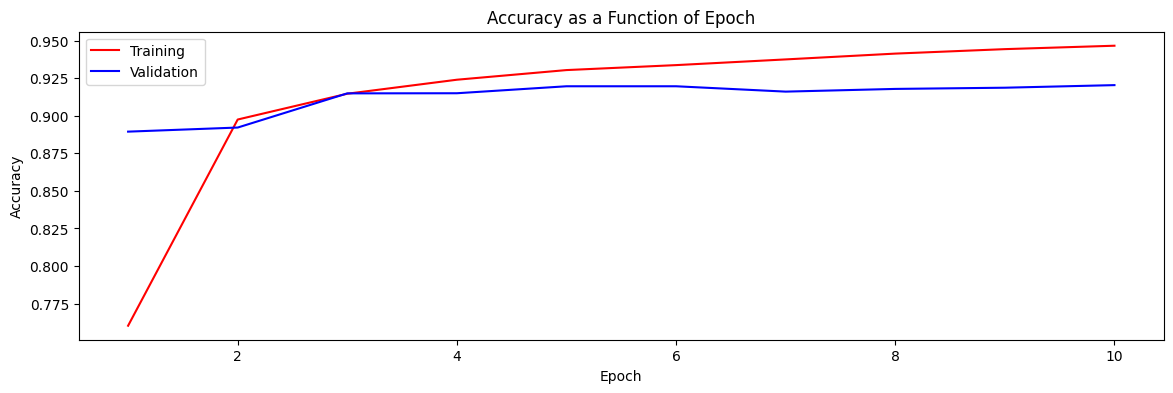

In [43]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [44]:
# Compute the accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = cnn1.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

650/650 [==============================] - 2s 4ms/step - loss: 0.2788 - accuracy: 0.9187
The loss value of the model on the test data is 0.2787919342517853
The accuracy of the model on the test data is 0.918749988079071
